In [49]:
nbfaces=6
import pandas as pd
import numpy as np
df=pd.DataFrame()


def incr3(nbface):
    a=0
    for i in range(1,nbface+1):
        for j in range(i,nbface+1):
            for k in range(j,nbface+1):
                a=a+1
    return a


def incr4(nbface):
    a=0
    for i in range(1,nbface+1):
        for j in range(i,nbface+1):
            for k in range(j,nbface+1):
                for l in range(j,nbface+1):
##                    print(i,j,k,l)
                    a=a+1
    return a
                
ar=np.empty((nbfaces,2))
print(ar.shape)

for b in range(1,nbfaces):
    print(incr3(b))
    ar[nbface-2,0]=incr3(b)
    print(ar[nbface-1,0])
    ar[nbface-2,1]=incr4(b)

ar


(6, 2)
1
2.228095580514e-312
4
2.228095580514e-312
10
2.228095580514e-312
20
2.228095580514e-312
35
2.228095580514e-312


array([[4.79060619e-310, 0.00000000e+000],
       [3.50000000e+001, 1.05000000e+002],
       [2.22809558e-312, 4.12213989e-061],
       [2.14538258e+184, 5.40177245e-066],
       [1.77496076e+160, 3.31635525e-033],
       [5.55266897e+170, 8.38848054e+165]])

[5.14682566e-310 0.00000000e+000 2.14321575e-312 2.22809558e-312
 2.46151512e-312 5.68175493e-322 3.16202013e-322]
4 dés à 3 faces
         0
1         
4.0    1.0
5.0    4.0
6.0   10.0
7.0   16.0
8.0   19.0
9.0   16.0
10.0  10.0
11.0   4.0
12.0   1.0
-----------
4 dés à 4 faces
         0
1         
4.0    1.0
5.0    4.0
6.0   10.0
7.0   20.0
8.0   31.0
9.0   40.0
10.0  44.0
11.0  40.0
12.0  31.0
13.0  20.0
14.0  10.0
15.0   4.0
16.0   1.0
-----------
4 dés à 5 faces
         0
1         
4.0    1.0
5.0    4.0
6.0   10.0
7.0   20.0
8.0   35.0
9.0   52.0
10.0  68.0
11.0  80.0
12.0  85.0
13.0  80.0
14.0  68.0
15.0  52.0
16.0  35.0
17.0  20.0
18.0  10.0
19.0   4.0
20.0   1.0
-----------
4 dés à 6 faces
          0
1          
4.0     1.0
5.0     4.0
6.0    10.0
7.0    20.0
8.0    35.0
9.0    56.0
10.0   80.0
11.0  104.0
12.0  125.0
13.0  140.0
14.0  146.0
15.0  140.0
16.0  125.0
17.0  104.0
18.0   80.0
19.0   56.0
20.0   35.0
21.0   20.0
22.0   10.0
23.0    4.0
24.0    1.0
-----------
1.

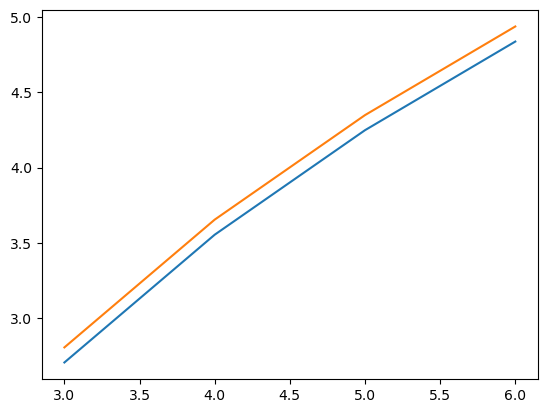

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
lsgen=[]

shift=0
maxfacedes=7+shift
minfacedes=3+shift
nbdes=4

#Fonction recursive qui génère le nombe de combinaison possible en iterant
# sur, pour 3 dé a trois face
# 111,112,113,122,123,133,222,223,233,333
# Puis le nombre de permutation est calculé
# 
chaine=np.empty((nbdes+3))
print(chaine)
def gen(nbface,depth,start,chaine):   
    chaine[depth]=start
    if(depth>0):
        for i in range(start,nbface+1):
            gen(nbface,depth-1,i,chaine)
    else:
        chaine[nbdes:]=0
        unique, counts = np.unique(chaine[:nbdes], return_counts=True)
        # Nombre de permutations total
        perms=math.factorial(nbdes)
        # nombre de mermutation des nombre identiques
        facts = np.array([math.factorial(xi) for xi in counts])
        facts = np.prod(facts)
        facts=perms/facts
        chaine[nbdes+1]=facts
        chaine[nbdes+2]=np.sum(chaine[:nbdes])
        #print(chaine)
        lsgen.append(chaine.copy())
        


diag=np.empty((maxfacedes,5))
for nbface in range(minfacedes,maxfacedes):
    print(nbdes,'dés à',nbface,'faces')
    lsgen=[]
    chaine=np.empty((nbdes+6))
    gen(nbface,nbdes,1,chaine)
    diag[nbface,0]=nbface
    diag[nbface,1]=len(lsgen)
    facescube=nbface*(nbface+1)*(nbface+2)*(nbface+3)/24
    diag[nbface,2]=facescube
    diag[nbface,3]=math.log(len(lsgen))
    diag[nbface,4]=math.log(facescube)
    lsgen=np.vstack(lsgen)
    print(pd.DataFrame(lsgen[:,nbdes+1:nbdes+3]).groupby(1).sum())
    print("-----------")
    
diag   
plt.plot(diag[minfacedes:,0],diag[minfacedes:,3])
plt.plot(diag[minfacedes:,0],diag[minfacedes:,4]+.1)

diag[:,1]

diff=diag[maxfacedes-3,3]-diag[maxfacedes-3,4]
print(math.exp(diff))
diff=diag[maxfacedes-2,3]-diag[maxfacedes-2,4]
print(math.exp(diff))
diff=diag[maxfacedes-1,3]-diag[maxfacedes-1,4]
print(math.exp(diff))




In [2]:
nbdes=20
nbface=6
print(nbdes,'dés à',nbface,'faces')
lsgen=[]
chaine=np.empty((nbdes+6))
gen(nbface,nbdes,1,chaine)
lsgen=np.vstack(lsgen)
cloche=pd.DataFrame(lsgen[:,nbdes+1:nbdes+3]).groupby(1).sum()


20 dés à 6 faces


0    1.894570e+14
dtype: float64


0.052233805653081805

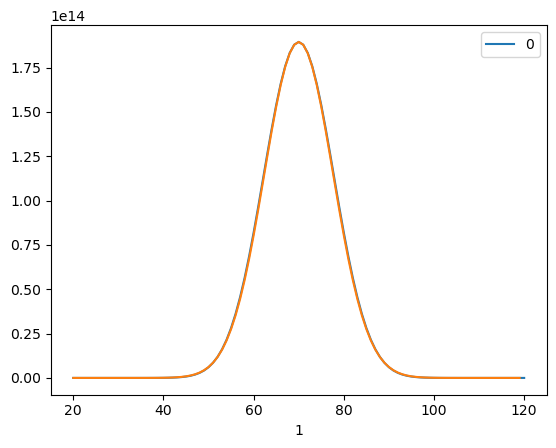

In [10]:

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np 

variancede=statistics.pvariance([1,2,3,4,5,6])
#initialize a normal distribution with frozen in mean=-1, std. dev.= 1
rv = norm(loc = 70, scale = math.sqrt(variancede*20))

x = np.arange(20, 120, 1)

#plot the pdfs of these normal distributions 
cloche.plot()
plt.plot(x, rv.pdf(x)/rv.pdf(70)*cloche[0].max())
plt.show()
import statistics

print(cloche.max())
rv.pdf(70)



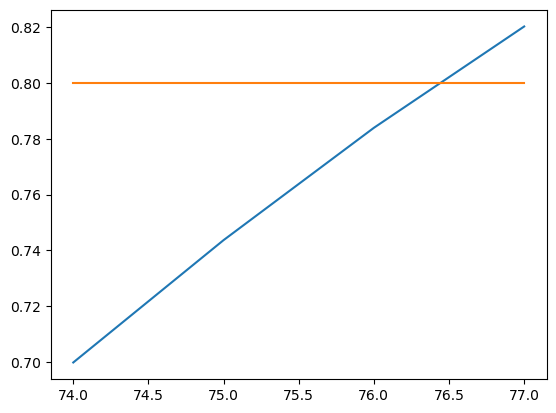

In [18]:
rv = norm(loc = 70, scale = math.sqrt(variancede*20))

x = np.arange(74, 78, 1)

#plot the pdfs of these normal distributions 

plt.plot(x, rv.cdf(x))
plt.plot([min(x),max(x)], [.8,.80])


3.5
5.5
86.0


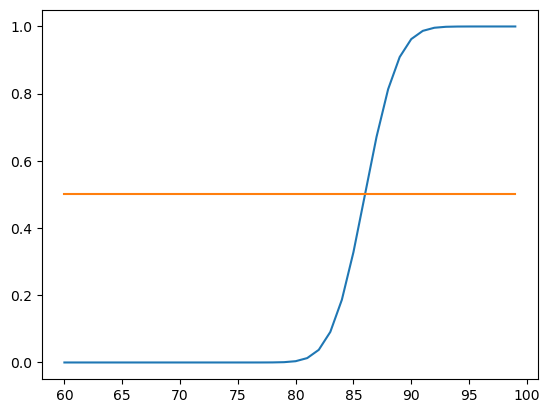

In [18]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm

import math
# Test de la loi nomale sur 12 dés à 6 faces et  8 dés a 10 face
import statistics as stats
de6=[1,2,3,4,5,6]
de10=[1,2,3,4,5,6,7,8,9,10]
moy6=stats.mean(de6)
var6=stats.pvariance(de6)
print(moy6)
moy10=stats.mean(de10)
var10=stats.pvariance(de10)
print(moy10)

vartot=(var6*12+var10*8)/20
moytot=(moy6*12+moy10*8)

rv = norm(loc = moytot, scale = math.sqrt(vartot))

x = np.arange(60, 100, 1)

#plot the pdfs of these normal distributions 

plt.plot(x, rv.cdf(x))
plt.plot([min(x),max(x)], [.5,.50])
print (moytot)

In [32]:
import random
somme=0
nbtirage=200000
for i in range(nbtirage):
    a=0
    for j in range(20):
        a=a+random.randint(1,6)
    if a>76:
        somme=somme+1

somme/nbtirage
        

0.198505

In [107]:
import math
import matplotlib.pyplot as plt

def gen(nbface,depth,start,chaine):   
    chaine=chaine+str(start)
    if(depth>0):
        for i in range(start,nbface+1):
            
            gen(nbface,depth-1,i,chaine)
    else:
        chaine=chaine[1:]
        lsgen.append(chaine)
        print(chaine)

logs=[]
for nbface in range(2,5):
    lsgen=[]
    gen(nbface,4,1,'')
    print(len(lsgen))
    print(math.log(len(lsgen)))
    logs.append(math.log(len(lsgen)))

##plt.bar(range(0,len(logs)),logs)


1111
11111
11112
11122
11222
5
1.6094379124341003
1111
11111
111111
11112
111122
111113
11122
111222
111223
111133
11222
112222
112223
112233
111333
15
2.70805020110221
1111
11111
111111
1111111
11112
111122
1111222
111113
1111133
1111114
11122
111222
1112222
111223
1112233
1112224
111133
1111333
1111334
1111144
11222
112222
1122222
112223
1122233
1122224
112233
1122333
1122334
1122244
111333
1113333
1113334
1113344
1111444
35
3.5553480614894135


1111
1112
1122
1222
2222
5
1.6094379124341003
1111
1112
1113
1122
1123
1133
1222
1223
1233
1333
2222
2223
2233
2333
3333
15
2.70805020110221
1111
1112
1113
1114
1122
1123
1124
1133
1134
1144
1222
1223
1224
1233
1234
1244
1333
1334
1344
1444
2222
2223
2224
2233
2234
2244
2333
2334
2344
2444
3333
3334
3344
3444
4444
35
3.5553480614894135


<BarContainer object of 3 artists>

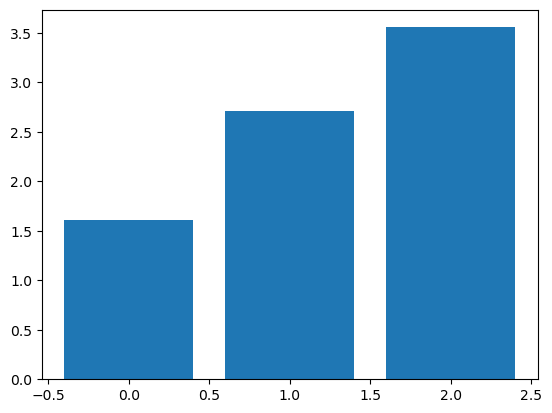

In [100]:
import math
import matplotlib.pyplot as plt
def gen(nbface,depth,start,chaine):   
    chaine=chaine+str(start)
    if(depth>0):
        for i in range(start,nbface+1):
            gen(nbface,depth-1,i,chaine)
    else:
        chaine=chaine[1:]
        lsgen.append(chaine)
        print(chaine)

logs=[]
for nbface in range(2,5):
    lsgen=[]
    gen(nbface,4,1,'')
    print(len(lsgen))
    print(math.log(len(lsgen)))
    logs.append(math.log(len(lsgen)))

plt.bar(range(0,len(logs)),logs)

